In [1]:
import heapq
from collections import defaultdict, deque
import time

In [2]:
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v, weight=1):
        self.graph[u].append((v, weight))
        self.graph[v].append((u, weight))  # Assuming undirected graph

    def dfs(self, start):
        visited = set()
        result = []

        def _dfs(v):
            if v not in visited:
                visited.add(v)
                result.append(v)
                for neighbor, _ in self.graph[v]:
                    _dfs(neighbor)

        _dfs(start)
        return result

    def bfs(self, start):
        visited = set()
        queue = deque([start])
        result = []

        while queue:
            node = queue.popleft()
            if node not in visited:
                visited.add(node)
                result.append(node)
                for neighbor, _ in self.graph[node]:
                    if neighbor not in visited:
                        queue.append(neighbor)

        return result

    def dijkstra(self, start):
        distances = {node: float('inf') for node in self.graph}
        distances[start] = 0
        priority_queue = [(0, start)]

        while priority_queue:
            current_distance, current_node = heapq.heappop(priority_queue)

            if current_distance > distances[current_node]:
                continue

            for neighbor, weight in self.graph[current_node]:
                distance = current_distance + weight
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    heapq.heappush(priority_queue, (distance, neighbor))

        return distances

## Representing the urban transportation network

In [3]:
transport_graph = Graph()
edges = [
    ("A", "B", 2), ("A", "C", 4), ("B", "D", 7),
    ("C", "D", 1), ("B", "E", 3), ("D", "E", 2),
    ("C", "F", 5), ("D", "F", 8), ("E", "F", 6)
]

for u, v, weight in edges:
    transport_graph.add_edge(u, v, weight)

# Running algorithms
start_node = "A"

# Depth-First Search
start_time = time.time()
dfs_result = transport_graph.dfs(start_node)
dfs_time = time.time() - start_time

# Breadth-First Search
start_time = time.time()
bfs_result = transport_graph.bfs(start_node)
bfs_time = time.time() - start_time

# Dijkstra's Algorithm
start_time = time.time()
dijkstra_result = transport_graph.dijkstra(start_node)
dijkstra_time = time.time() - start_time

# Results
print("DFS Result:", dfs_result)
print("DFS Time:", dfs_time, "seconds")

print("BFS Result:", bfs_result)
print("BFS Time:", bfs_time, "seconds")

print("Dijkstra's Shortest Paths:", dijkstra_result)
print("Dijkstra Time:", dijkstra_time, "seconds")

# Analyzing efficiency and complexity
print("\nEfficiency and Complexity Analysis:")
print("DFS Complexity: O(V + E), where V is vertices and E is edges.")
print("BFS Complexity: O(V + E), similar to DFS but uses a queue.")
print("Dijkstra's Complexity: O((V + E) log V) with a priority queue.")

DFS Result: ['A', 'B', 'D', 'C', 'F', 'E']
DFS Time: 0.0 seconds
BFS Result: ['A', 'B', 'C', 'D', 'E', 'F']
BFS Time: 0.0 seconds
Dijkstra's Shortest Paths: {'A': 0, 'B': 2, 'C': 4, 'D': 5, 'E': 5, 'F': 9}
Dijkstra Time: 0.0008356571197509766 seconds

Efficiency and Complexity Analysis:
DFS Complexity: O(V + E), where V is vertices and E is edges.
BFS Complexity: O(V + E), similar to DFS but uses a queue.
Dijkstra's Complexity: O((V + E) log V) with a priority queue.


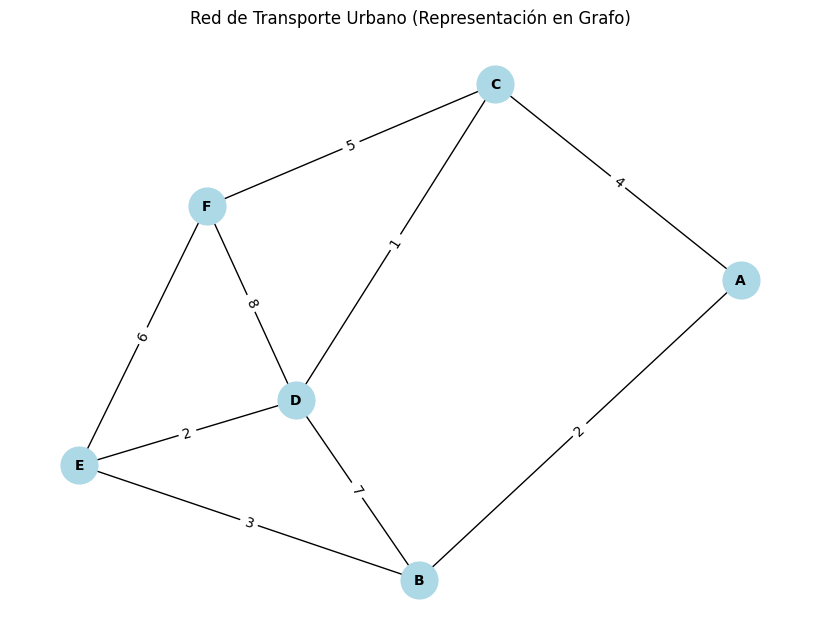

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Creando el grafo con NetworkX para la visualización
G = nx.Graph()

# Añadiendo aristas y pesos
edges = [
    ("A", "B", 2), ("A", "C", 4), ("B", "D", 7),
    ("C", "D", 1), ("B", "E", 3), ("D", "E", 2),
    ("C", "F", 5), ("D", "F", 8), ("E", "F", 6)
]
for u, v, weight in edges:
    G.add_edge(u, v, weight=weight)

# Dibujando el grafo con etiquetas de pesos
pos = nx.spring_layout(G)  # Posicionando los nodos para una disposición clara
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=10, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title("Red de Transporte Urbano (Representación en Grafo)")
plt.show()


In [5]:
def visualize_path(path, title):
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=10, font_weight="bold", alpha=0.5)
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="orange", node_size=700)
    plt.title(title)
    plt.show()

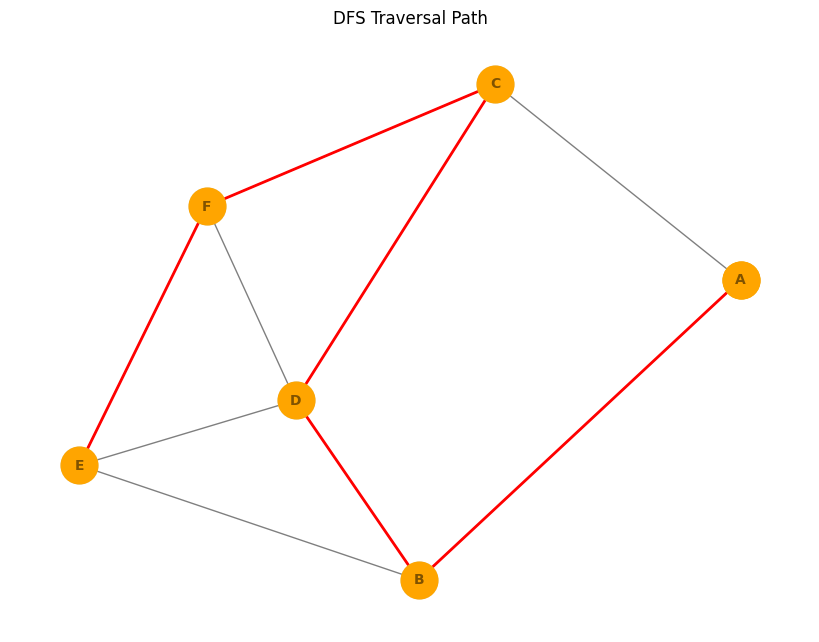

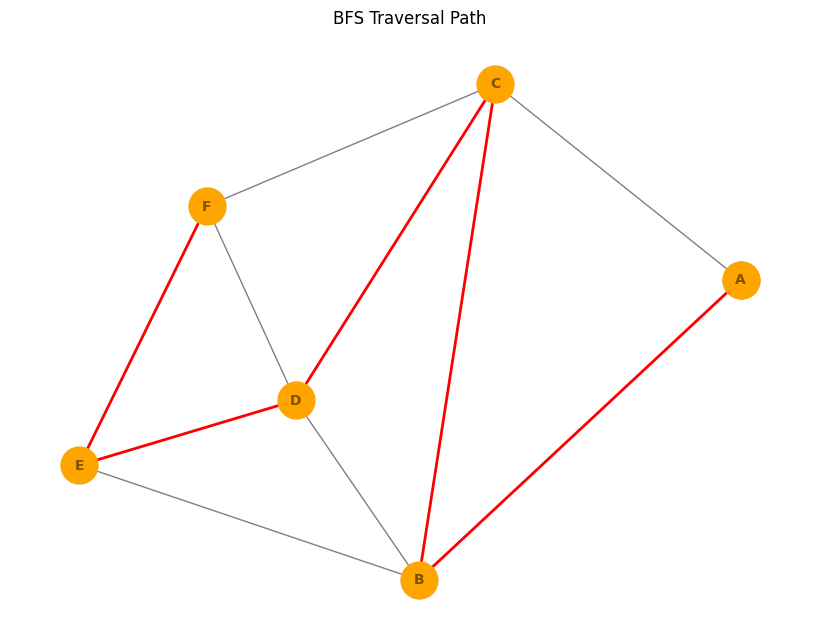

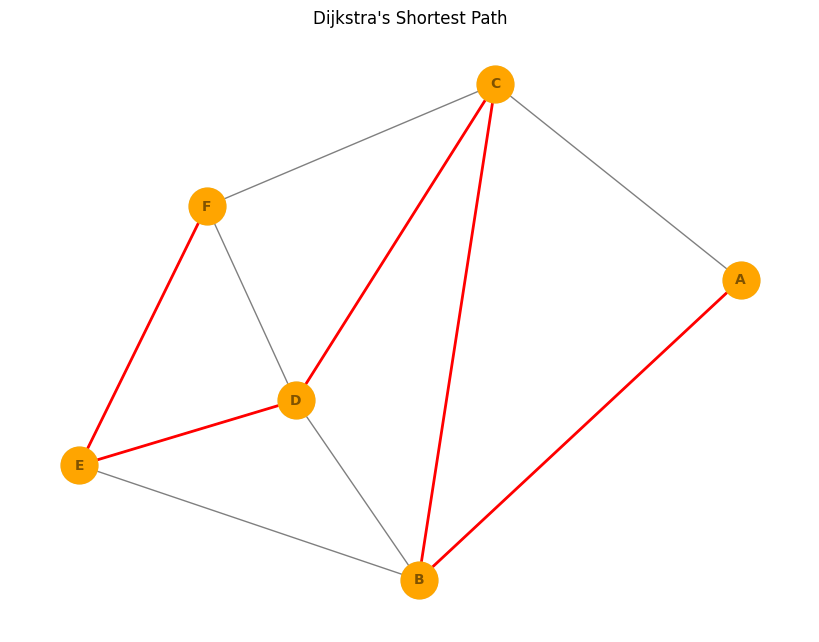

In [6]:
# Re-define the graph and necessary algorithms
import heapq
from collections import defaultdict, deque

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v, weight=1):
        self.graph[u].append((v, weight))
        self.graph[v].append((u, weight))

    def dfs(self, start):
        visited = set()
        result = []

        def _dfs(v):
            if v not in visited:
                visited.add(v)
                result.append(v)
                for neighbor, _ in self.graph[v]:
                    _dfs(neighbor)

        _dfs(start)
        return result

    def bfs(self, start):
        visited = set()
        queue = deque([start])
        result = []

        while queue:
            node = queue.popleft()
            if node not in visited:
                visited.add(node)
                result.append(node)
                for neighbor, _ in self.graph[node]:
                    if neighbor not in visited:
                        queue.append(neighbor)

        return result

    def dijkstra(self, start):
        distances = {node: float('inf') for node in self.graph}
        distances[start] = 0
        priority_queue = [(0, start)]

        while priority_queue:
            current_distance, current_node = heapq.heappop(priority_queue)

            if current_distance > distances[current_node]:
                continue

            for neighbor, weight in self.graph[current_node]:
                distance = current_distance + weight
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    heapq.heappush(priority_queue, (distance, neighbor))

        return distances

# Re-creating the graph
transport_graph = Graph()
edges = [
    ("A", "B", 2), ("A", "C", 4), ("B", "D", 7),
    ("C", "D", 1), ("B", "E", 3), ("D", "E", 2),
    ("C", "F", 5), ("D", "F", 8), ("E", "F", 6)
]
for u, v, weight in edges:
    transport_graph.add_edge(u, v, weight)

# DFS, BFS, and Dijkstra's paths
dfs_path = ["A"] + transport_graph.dfs("A")
bfs_path = ["A"] + transport_graph.bfs("A")
dijkstra_result = transport_graph.dijkstra("A")
dijkstra_path = list(dijkstra_result.keys())

# Visualize paths again
visualize_path(dfs_path, "DFS Traversal Path")
visualize_path(bfs_path, "BFS Traversal Path")
visualize_path(dijkstra_path, "Dijkstra's Shortest Path")
